In [3]:
%matplotlib notebook
from modsim import *
import numpy as np
import pandas as pd
import operator as op

In [4]:
"""  Team 4

    h: heat transfer coefficient, 10 in this case, for static air cooling
    (related website: https://link.springer.com/article/10.1007/s00231-015-1652-x)
    k_f: the cryoscopic constant, For water, KF = 1.853 K·kg/mol;
    num_ions: the van 't Hoff factor (number of ion particles per individual molecule of solute, e.g. i = 2 for NaCl, 3 for BaCl2).
    (related website: https://en.wikipedia.org/wiki/Freezing-point_depression)
    
    max_soluability for NaCl: 35.65g/mol = 6.15 mole/kg
    A: 686.966 cm^2 = 0.0686966 m^2, surface area of a 500mL water bottle
    (related website: https://www.bottleyourbrand.com/answers/sizing/arrowhead-water-bottle-label-size
    
    T_init: -25Celsius, Initial Temperature of the water bottle, set in Northern Siberia
    (related website: https://en.wikipedia.org/wiki/Siberia)
    k_water: 0.0387
    (related_website: http://jwilson.coe.uga.edu/EMAT6680Fa2014/Gieseking/Exploration%2012/Newton%27s%20Law%20of%20Cooling.htm)
    k_ice: twice k_water
"""
k_f = 1.853 #K*Kg/mol
num_ions = 2 #Number of Ions in NaCl
A = 0.0686966
T_init = -25
T_env = 15
T_end = 4 #Temprature 
latent_heat = 334
#latent_heat=100
h = 10
k_water, k_ice = 0.0384, 0.0774
#k_water, k_ice = 0.01, 0.0392
molality_array= linspace(0, 6.147, 10)
freezing_point_array = 0 - molality_array * k_f * num_ions

r=.002
dt=1
freezing_point_array

array([  0.      ,  -2.531198,  -5.062396,  -7.593594, -10.124792,
       -12.65599 , -15.187188, -17.718386, -20.249584, -22.780782])

In [5]:
molality_array

array([ 0.   ,  0.683,  1.366,  2.049,  2.732,  3.415,  4.098,  4.781,
        5.464,  6.147])

# Newton's cooling
The section below employs Newton's cooling to calculate temperature

In [3]:
ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
water = System(T_init=0, T_env=20, T_end=4, k=k_water, T=-25)

def newton_cooling(system, t):
    """Calculates the change in temperature over time"""
    #e=2.71828
    T=system.T
    #T = system.T_env + (system.T_init - system.T_env)*e**(-system.k*t)
    
    #system.T=T
    #return system.T
    T += -r * (system.T - T_env) * dt
    
    system.T = T
    
    return system.T

def run_simulation(system, t):
    results=TimeSeries()
    for i in range(t):
        x=newton_cooling(system, i)
        results[i]=x
    return results

run_simulation(ice, 50)

,value
0,-24.920000
1,-24.840160
2,-24.760480
3,-24.680959
4,-24.601597
5,-24.522394
6,-24.443349
7,-24.364462
8,-24.285733
9,-24.207162


<IPython.core.display.Javascript object>


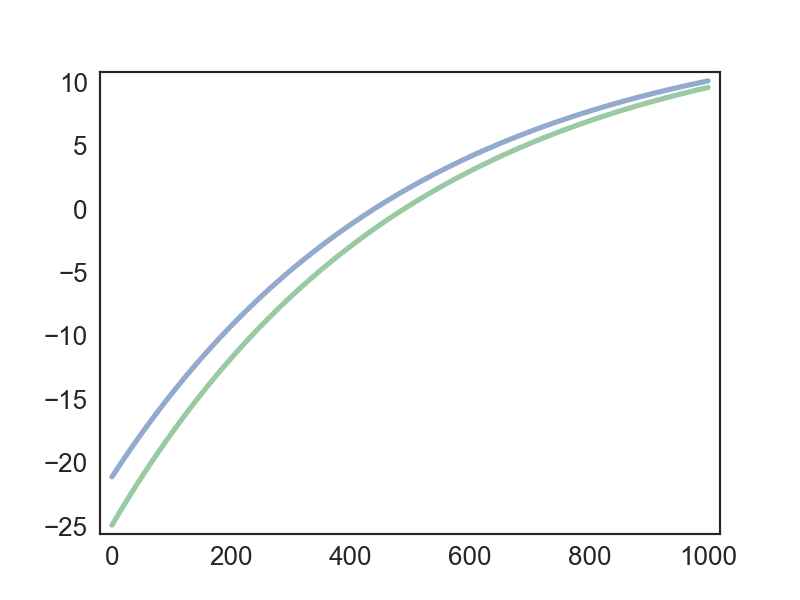

In [4]:
newfig()
def plot_results(system, t):
    y=run_simulation(system, t)
    plot(y)
    
plot_results(ice, 1000)
plot_results(water, 1000)

# Melting
The section below calculates the time it takes for water at each salt level to melt

In [9]:
def melting_at(T_fpt):
    dQ = 500 * latent_heat
    dt = dQ / (10 * A *(T_fpt - T_env))
    return -dt/60

In [10]:
def get_melting_time(freezing_point_array, update_func):
    arrary_length = len(freezing_point_array)
    sweep_fpt = TimeSeries()
    #sweep_fpt.columns('Time(s)')
    for i in range(0, arrary_length):
        sweep_fpt.loc[i+1] = update_func(freezing_point_array[i])
    return sweep_fpt

In [11]:
len(freezing_point_array)

10

In [12]:
get_melting_time(freezing_point_array, melting_at)

,value
1,270.108791
2,231.109811
3,201.951545
4,179.326576
5,161.260315
6,146.501060
7,134.216935
8,123.833488
9,114.941267
10,107.240551


In [13]:
results_in_minutes = get_melting_time(freezing_point_array, melting_at)
results_in_minutes


,value
1,270.108791
2,231.109811
3,201.951545
4,179.326576
5,161.260315
6,146.501060
7,134.216935
8,123.833488
9,114.941267
10,107.240551


<IPython.core.display.Javascript object>


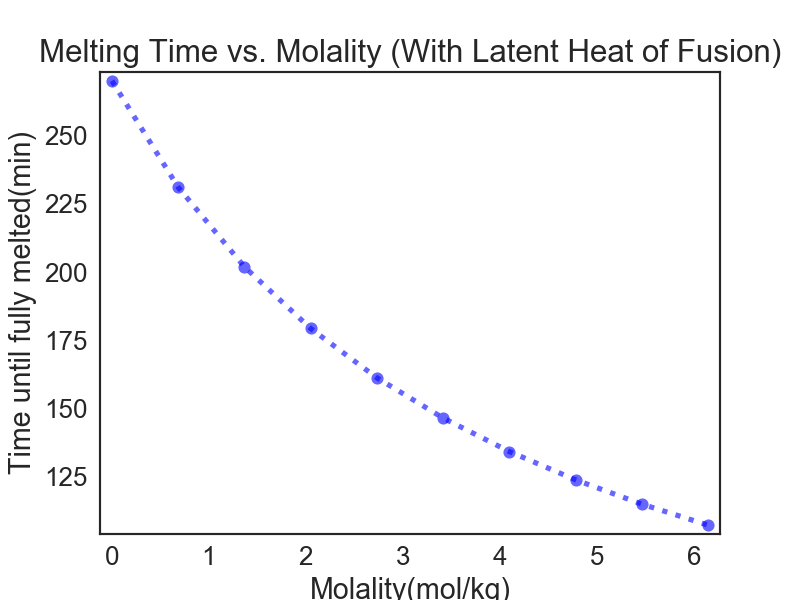

In [14]:
newfig()
plot(molality_array, results_in_minutes, 'bo:')
decorate(title='Melting Time vs. Molality (With Latent Heat of Fusion)',
         xlabel = 'Molality(mol/kg)',
         ylabel = 'Time until fully melted(min)',
         legend = False)

In [15]:
a = np.array(results_in_minutes)
np.diff(results_in_minutes)

array([-38.99897947, -29.15826665, -22.62496821, -18.06626187,
       -14.75925417, -12.28412501, -10.38344735,  -8.89222061,  -7.70071689])

In [16]:
results_in_minutes

,value
1,270.108791
2,231.109811
3,201.951545
4,179.326576
5,161.260315
6,146.501060
7,134.216935
8,123.833488
9,114.941267
10,107.240551


# Newton's Cooling(stop at Freezing Pts)

In [17]:
def run_simulation_ice(t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results=TimeSeries()
        recorded = False
        system = System(T_init=-25, T_env=T_env, T_end=4, k=k_ice, T=-25)
        for i in range(t):
            #print(str(freezing_pt)+"hello")
            x=newton_cooling(system, i)
            results[i] = x
            if x > freezing_pt and not recorded:
                #print(freezing_pt)
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature

In [18]:
#ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
%time time2stop_ice, temperature_solid = run_simulation_ice(1000, freezing_point_array)

Wall time: 5.29 s


In [19]:
#run_simulation_ice(ice, 100, freezing_point_array)
temperature_solid[:100]

,0.0,-2.531198,-5.062396,-7.593594,-10.124792,-12.65599,-15.187188,-17.718386,-20.249584,-22.780782
0,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000,-24.920000
1,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160,-24.840160
2,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480,-24.760480
3,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959,-24.680959
4,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597,-24.601597
5,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394,-24.522394
6,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349,-24.443349
7,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462,-24.364462
8,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733,-24.285733
9,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162,-24.207162


In [20]:
temperature_solid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_solid
time2stop_ice

,value
1,489
2,412
3,344
4,285
5,232
6,184
7,140
8,100
9,63
10,28


# Liquid

In [21]:
def newton_cooling_above_freezing(system, t, freezing_pt):
    """Calculates the change in temperature over time"""
    #e=2.71828
    #T_init = freezing_pt
    #T=system.T
    #T = system.T_env + (T_init - system.T_env)*e**(-system.k*t)
    #system.T=T
    #return system.T
    '''if not assigned:
        T=freezing_pt
        assigned = True
    '''
    if t == 0:
        T = freezing_pt
        a = str(T)
        #print("initial temp"+a)
    else:
        T = system.T
        #print(T)
    T += -r * (T-T_env) * dt
    system.T = T
    return system.T

def run_simulation_water(system, t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results = TimeSeries()
        recorded = False
        assigned = False
        system = System(T_init=0, T_env=T_env, T_end=4, k=k_water, T=0)
        for i in range(t):
            x=newton_cooling_above_freezing(system, i, freezing_pt)
            results[i] = x
            if x > 4 and not recorded:
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature


In [22]:
time2stop, temperature_liquid = run_simulation_water(water, 800, freezing_point_array)

In [23]:
#run_simulation_water(water, 1000, freezing_point_array)
time2stop

,value
1,154
2,232
3,300
4,359
5,412
6,460
7,504
8,544
9,581
10,616


In [24]:
def onerun(t, numrun, freezing_pt):
    """Calculates data points for one run of the simulation for one level of salt.
    
    system1=ice system
    system2=latent heat system
    system3=water system
    t=amount of time running the array
    numrun=run number corresponding with appropriate salt level (between 0 and 10)
    freezing_pt=the temperature of the freezing point that corresponds with the level of salt.
    """
    below=time2stop_ice[numrun]
    middle=time2stop_ice[numrun] + results_in_minutes[numrun]
    high=time2stop_ice[numrun] + results_in_minutes[numrun] + time2stop[numrun]
    #freezing_pt = freezing_point_array[numrun]
    #print(below, middle, high)
    plotpoints=TimeSeries()
    system1 = System(T_init=-25, T_env=T_end, T_end=4, k=k_ice, T=-25)
    system3 = System(T_init=-25, T_env=T_end, T_end=4, k=k_water, T=freezing_pt)
    for i in range(t):
        if i<= below:
            plotpoints[i] = newton_cooling(system1, i)
        elif i>below and i<=middle:
            plotpoints[i] = freezing_pt #the corresponding freezing temperature
        elif i > middle and i <= high:
            check= newton_cooling_above_freezing(system3, (i-middle), freezing_pt)
            plotpoints[i] = check
            if check > 4:
                break
        else:
            break
    return plotpoints    

In [25]:

onerun(10000, 1, 0)


,value
0,-24.920000
1,-24.840160
2,-24.760480
3,-24.680959
4,-24.601597
5,-24.522394
6,-24.443349
7,-24.364462
8,-24.285733
9,-24.207162


<IPython.core.display.Javascript object>


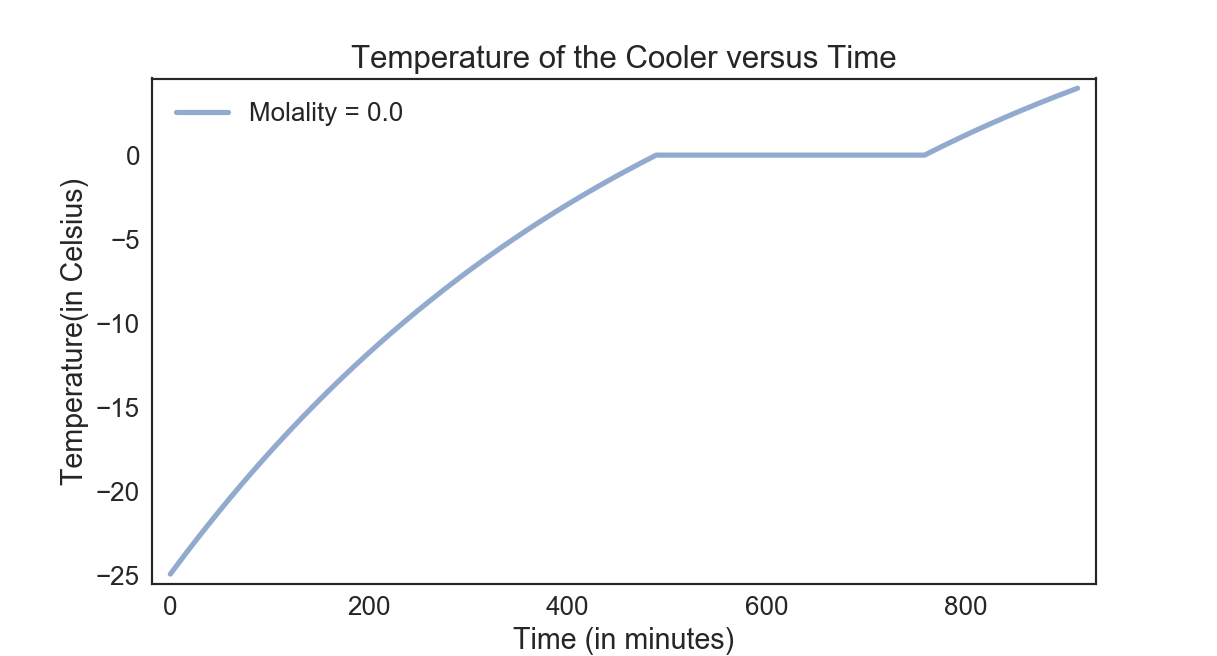

In [26]:
def plot_onerun(t, numrun, freezing_pt):
    """numrun=run number, starts at 0 with 0 degrees celsius and no salt
    freezing_point_array[x]= the temperature corresponding with the salt level. STARTS AT 0 WITH NO SALT."""
    x=onerun(t, numrun, freezing_pt)
    x_label ="Molality = " + str(molality_array[numrun-1])
    plot(x, label = x_label)
    decorate(title='Temperature of the Cooler versus Time',
             xlabel='Time (in minutes)', ylabel='Temperature(in Celsius)', legend=True)
    legend(loc='best', labelspacing=0.2)
newfig()
plot_onerun(1000, 1, freezing_point_array[0])

In [27]:
def plot_allruns(t, freezing_point_array):
    array_length = len(freezing_point_array)
    for i in range(array_length):
        plot_onerun(t, i+1, freezing_point_array[i])

<IPython.core.display.Javascript object>


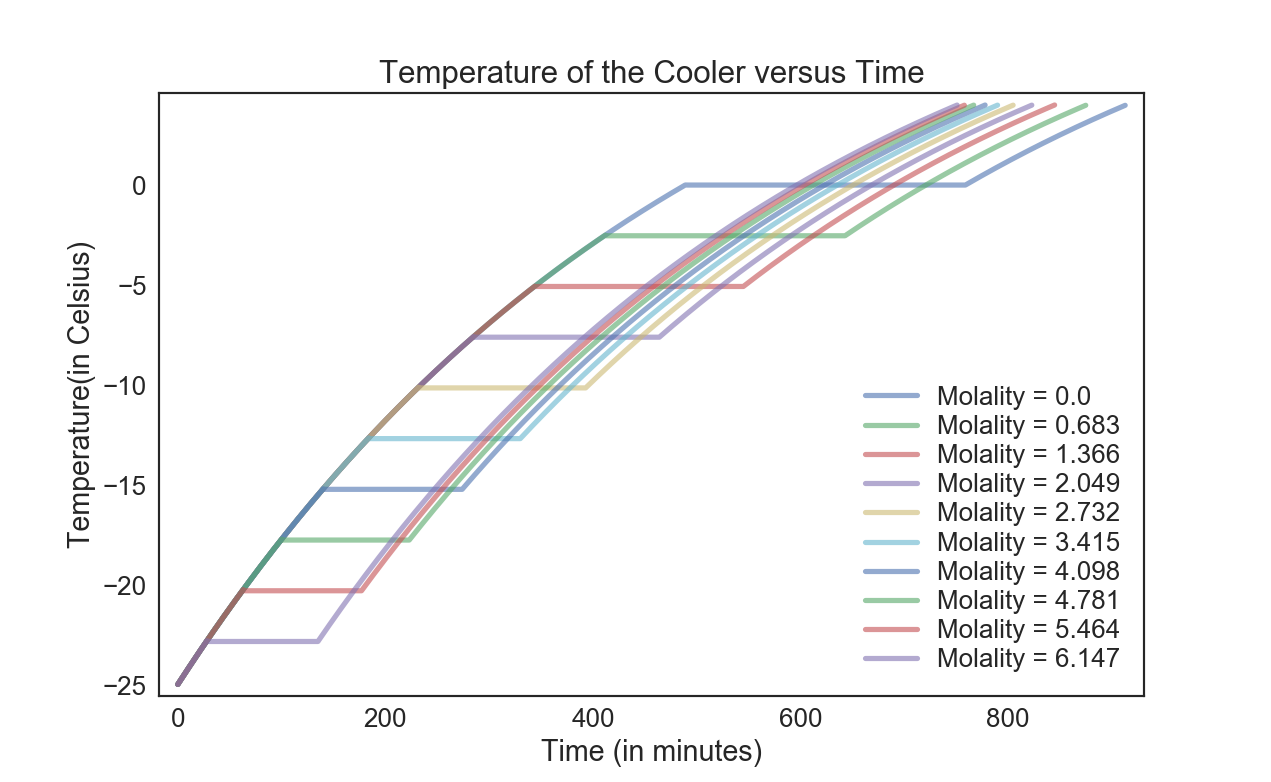

In [28]:
newfig()
plot_allruns(1500, freezing_point_array)

In [30]:
temperature_liquid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_liquid

,salt0,salt1,salt2,salt3,salt4,salt5,salt6,salt7,salt8,salt9
0,0.030000,-2.496136,-5.022271,-7.548407,-10.074542,-12.600678,-15.126814,-17.652949,-20.179085,-22.705220
1,0.059940,-2.461143,-4.982227,-7.503310,-10.024393,-12.545477,-15.066560,-17.587643,-20.108727,-22.629810
2,0.089820,-2.426221,-4.942262,-7.458303,-9.974345,-12.490386,-15.006427,-17.522468,-20.038509,-22.554550
3,0.119640,-2.391369,-4.902378,-7.413387,-9.924396,-12.435405,-14.946414,-17.457423,-19.968432,-22.479441
4,0.149401,-2.356586,-4.862573,-7.368560,-9.874547,-12.380534,-14.886521,-17.392508,-19.898495,-22.404482
5,0.179102,-2.321873,-4.822848,-7.323823,-9.824798,-12.325773,-14.826748,-17.327723,-19.828698,-22.329673
6,0.208744,-2.287229,-4.783202,-7.279175,-9.775148,-12.271122,-14.767095,-17.263068,-19.759041,-22.255014
7,0.238327,-2.252654,-4.743636,-7.234617,-9.725598,-12.216579,-14.707560,-17.198542,-19.689523,-22.180504
8,0.267850,-2.218149,-4.704148,-7.190148,-9.676147,-12.162146,-14.648145,-17.134145,-19.620144,-22.106143
9,0.297314,-2.183713,-4.664740,-7.145767,-9.626795,-12.107822,-14.588849,-17.069876,-19.550904,-22.031931


In [ ]:
molali

In [31]:
sum_time = results_in_minutes + time2stop + time2stop_ice
sum_time

1     913.108791
2     875.109811
3     845.951545
4     823.326576
5     805.260315
6     790.501060
7     778.216935
8     767.833488
9     758.941267
10    751.240551
dtype: float64

<IPython.core.display.Javascript object>


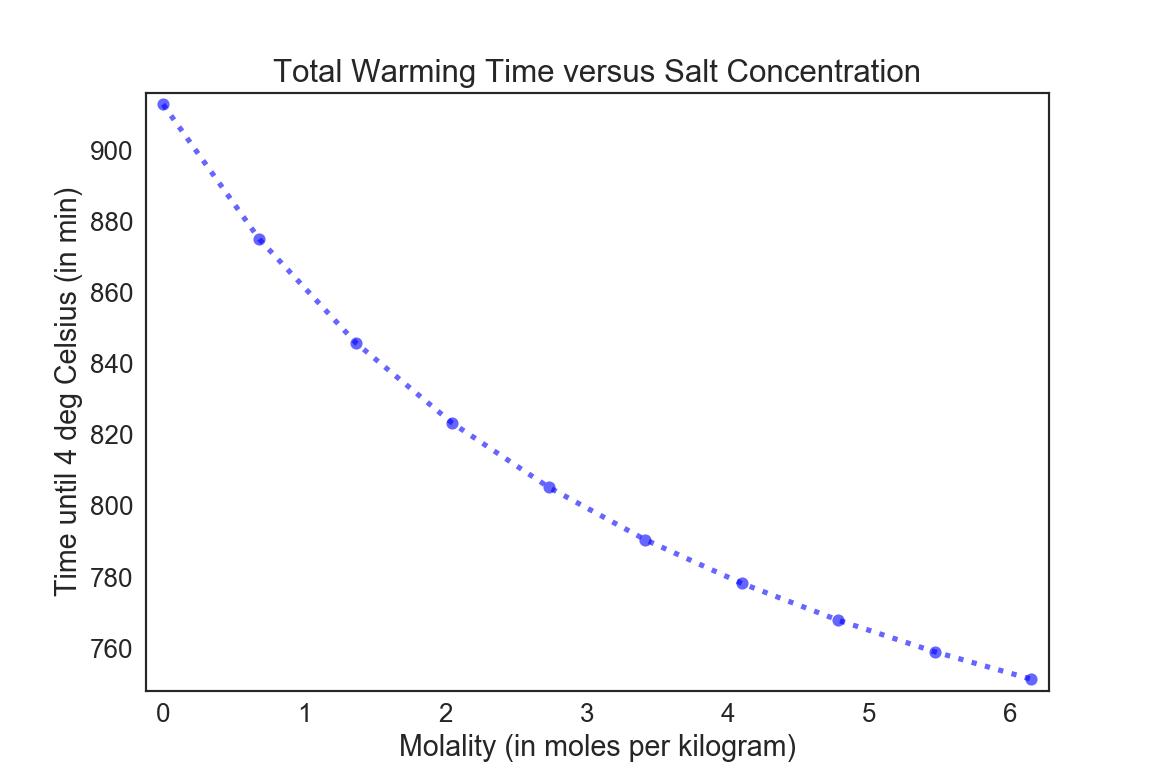

In [33]:
newfig()
plot(molality_array, sum_time, 'bo:')
decorate(title='Total Warming Time versus Salt Concentration', 
         xlabel='Molality (in moles per kilogram)', 
         ylabel='Time until 4 deg Celsius (in min)', 
         legend=False)